* 공공데이터분석 기말고사 2024.06.17 (월)

In [22]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# ipynb 시험파일, html 시험파일, 데이터를 다운 받고,
# ipynb 시험 파일은 파일명 수정 -> da월_기말_20181234_홍길동.ipynb.

# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.
# 문제에 주어진 코드는 수정 불가.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (문제의 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 갑자기 컴퓨터에 문제가 생길수 있으니, 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 기말고사> 에 업로드.


In [23]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
numpy 1.24.3
pandas 2.2.2
matplotlib 3.7.1
seaborn 0.13.2


# dat1 load (문제1-3 사용)

In [24]:
dat1=pd.read_csv('data/dat1_상권정보.csv', sep=',')
dat1.head(3)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122
1,MA010120220804242022,하나오토,수리·개인,자동차 수리·세차,자동차 정비소,자동차 전문 수리업,서울특별시,광진구,자양2동,자양동,대지,607.0,서울특별시 광진구 자양동 607-13,서울특별시 광진구 뚝섬로,612.0,서울특별시 광진구 뚝섬로 612-1,127.077686,37.532375
2,MA010120220813745897,호리존잠원스튜디오,시설관리·임대,산업용품 대여,기타 산업용 기계/장비 대여업,기타 산업용 기계 및 장비 임대업,서울특별시,서초구,잠원동,잠원동,대지,45.0,서울특별시 서초구 잠원동 45-21,서울특별시 서초구 신반포로43길,11.0,서울특별시 서초구 신반포로43길 11-40,127.016841,37.510449


# 문제1
* df1은 서울특별시와 부산광역시의 상점데이터를 담고있다. 중분류명이 '한식'인 상점들에 대해서, 각 소분류명에 속한 상점의 개수를 bargraph로 나타내시오
* 조건1) seaborn 함수를 사용하시오
* 조건2) 상점이 많이 있는 소분류명 순서대로 나타내시오


<Axes: xlabel='count', ylabel='상권업종소분류명'>

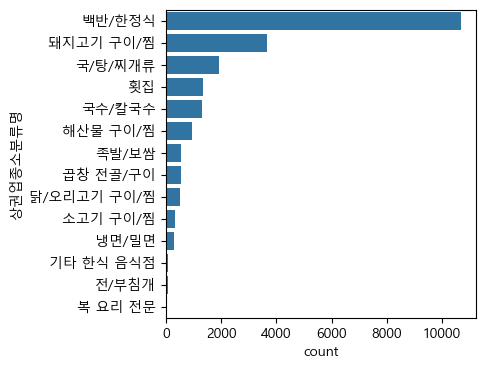

In [25]:
df1=dat1.copy()

fig=plt.figure(figsize=(4,4),dpi=100)
ax1=fig.subplots()

## 코드작성
sr1a=df1.loc[df1["상권업종중분류명"] == "한식", '상권업종소분류명'].value_counts()

sns.barplot(sr1a, orient='h', ax=ax1)
#sns.barplot(y=sr1a.index, x=sr1a.values)
## 코드작성 끝

# 문제2
* df2가 주어져 있다. df2에서 결측치를 하나이상 가지고있는 행을 담은 df2_res을 생성하시오
* 힌트1) loc을 통한 selection 활용 (다른 방법도 사용 가능)

In [26]:
df2=dat1.copy()

## 코드작성
sr2a=df2.isnull().sum(axis=1)
sr2b=sr2a.loc[sr2a>0]
df2_res=df2.loc[sr2b.index]

## 코드작성 끝
df2_res.head(3)
df2_res.shape

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
100,MA0101202211C0007339,대창,음식,한식,곱창 전골/구이,NaN,서울특별시,노원구,상계1동,상계동,대지,1302.0,서울특별시 노원구 상계동 1302,서울특별시 노원구 수락산로,246.0,서울특별시 노원구 수락산로 246,127.051338,37.671233
4127,MA0101202209C0041767,에임하이영어교습소,교육,일반 교육,입시·교과학원,NaN,서울특별시,강서구,등촌3동,등촌동,대지,691.0,서울특별시 강서구 등촌동 691-3,서울특별시 강서구 강서로56나길,110.0,서울특별시 강서구 강서로56나길 110,126.842827,37.563502
13100,MA0101202305A0010643,아시아국제커피협회,음식,비알코올,카페,NaN,서울특별시,강북구,송천동,미아동,대지,1261.0,서울특별시 강북구 미아동 1261-357,서울특별시 강북구 숭인로,3.0,서울특별시 강북구 숭인로 3,127.022399,37.611529


(37, 18)

# 문제3
* df3에는 서울시의 각 구 별로 대분류가 '교육'과 '음식'인 상점의 개수가 담겨있다.
* df3에 1) melt를 적용한 후, 그 결과에 2) seaborn barplot을 적용하여 결과 그림을 나타내시오
* (구의 순서는 채점과 무관)

상권업종대분류명,교육,음식
시군구명,,
강남구,1384,3951
강동구,323,1608
강북구,151,1252
강서구,456,2133
관악구,302,1842
광진구,295,1563
구로구,244,1559
금천구,166,1153
노원구,332,1371


<Axes: xlabel='시군구명', ylabel='개수'>

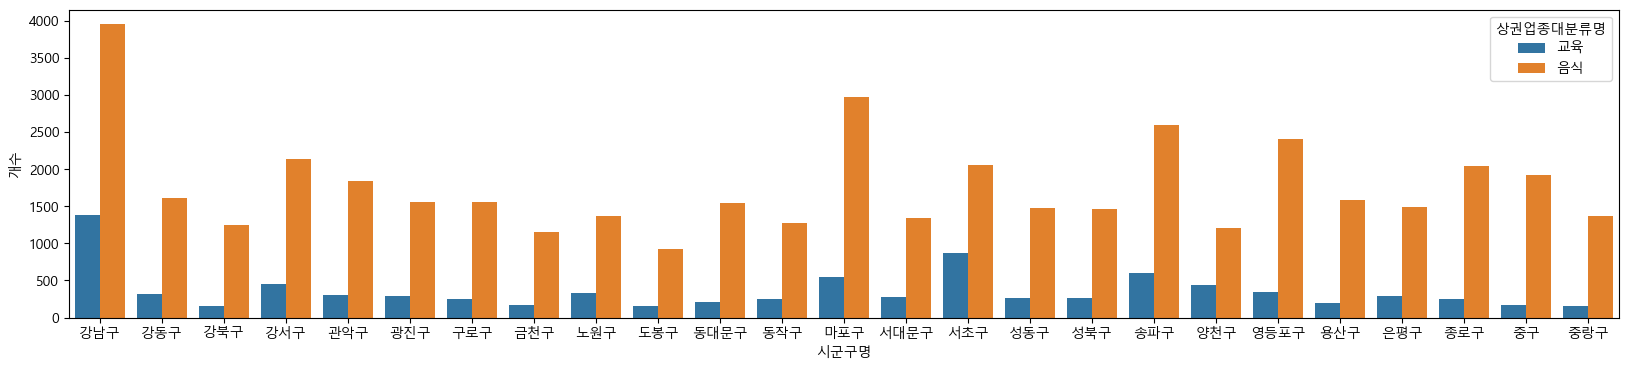

In [27]:
df3=dat1.copy()
df3=df3.loc[(df3['상권업종대분류명'].isin(['음식','교육']))&(df3['시도명']=='서울특별시')]
df3=df3[['상권업종대분류명','시군구명']].value_counts().unstack(0)
df3

fig=plt.figure(figsize=(20,4),dpi=100)
ax1=fig.subplots()

## 코드작성
df3a=df3.reset_index().melt(id_vars='시군구명', var_name='상권업종대분류명', value_name='개수')
sns.barplot(data=df3a,x='시군구명',y='개수', hue='상권업종대분류명', ax=ax1)
## 코드작성 끝

# 문제4
* 아래와 같은 axes를 생성하시오

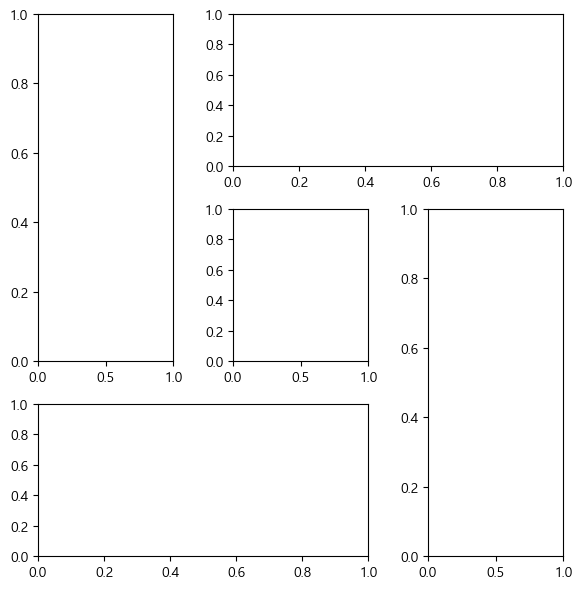

In [28]:
fig=plt.figure(figsize=(6,6), dpi=100)

## 코드작성
ax1=fig.add_subplot(3,3,(1,4))
ax2=fig.add_subplot(3,3,(2,3))
ax3=fig.add_subplot(3,3,(5,5))
ax4=fig.add_subplot(3,3,(7,8))
ax5=fig.add_subplot(3,3,(6,9))

## 코드작성 끝

fig.tight_layout()

# dat2 load (문제5-7, 12 사용)
* 전국도시공원표준데이터

In [29]:
dat2 = pd.read_csv("data/dat2_전국도시공원표준데이터.csv", encoding="cp949")
dat2=dat2.loc[dat2['소재지지번주소'].notnull()].copy()
dat2['시도']=dat2["소재지지번주소"].map(lambda x: x.split(' ')[0])
dat2=dat2[['공원명','공원구분','시도','위도','경도','공원보유시설(편익시설)','공원면적']]
dat2.head(2)

,공원명,공원구분,시도,위도,경도,공원보유시설(편익시설),공원면적
0,구랑공원,문화공원,부산광역시,35.157215,128.854935,화장실,9137.0
1,압곡공원,근린공원,부산광역시,35.154655,128.854727,NaN,33756.0


# 문제5
* 주어진 df5를 활용하여, 각 공원구분에 속한 공원의 수를 bar그래프로 나타내는데 top3에 해당하는 공원구분만 나타내시오
* 조건1) 공원의 수가 많은 것 -> 적은 것 순서대로 공원구분을 나타내시오
* 시각화 시, countplot 함수를 사용하시오

공원구분
어린이공원    9470
근린공원     3872
소공원      2541
Name: count, dtype: int64

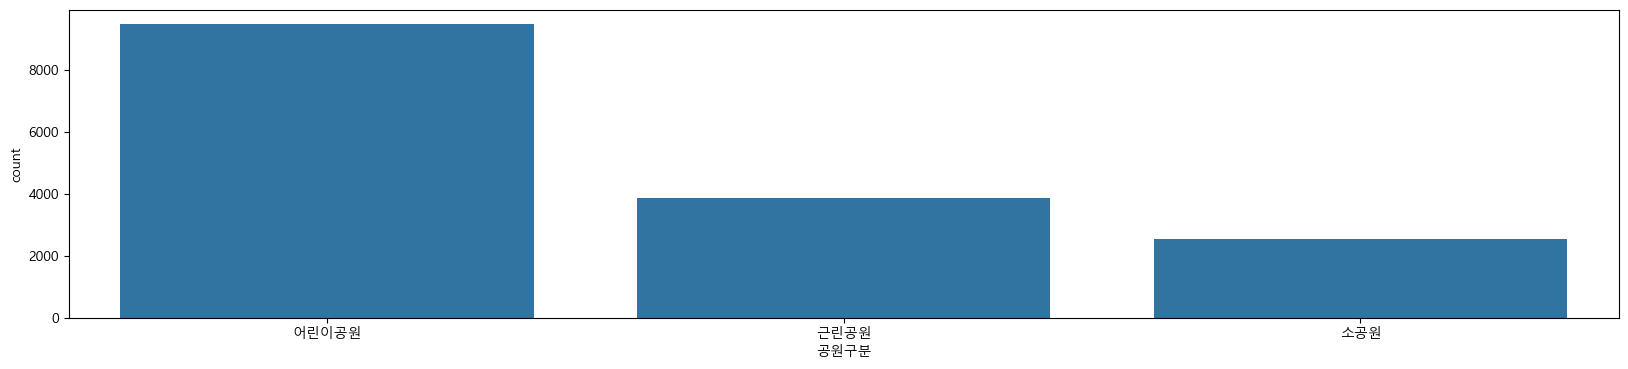

In [30]:
df5=dat2.copy()

fig=plt.figure(figsize=(20,4),dpi=100)
ax1=fig.subplots()

## 코드작성
ind5=df5['공원구분'].value_counts().head(3).index
df5['공원구분'].value_counts().head(3)
_=sns.countplot(data=df5, x='공원구분', order=ind5, ax=ax1)
## 코드작성 끝

# 문제6
* 주어진 df6를 가지고, 각 시도 별로, 각 공원구분에 해당하는 공원의 수를 시각화하는 코드이다
* 중간에 비워진 코드를 채우시오
* 조건1) x tick order는 주어진 x_tick_order로 모두 통일하시오

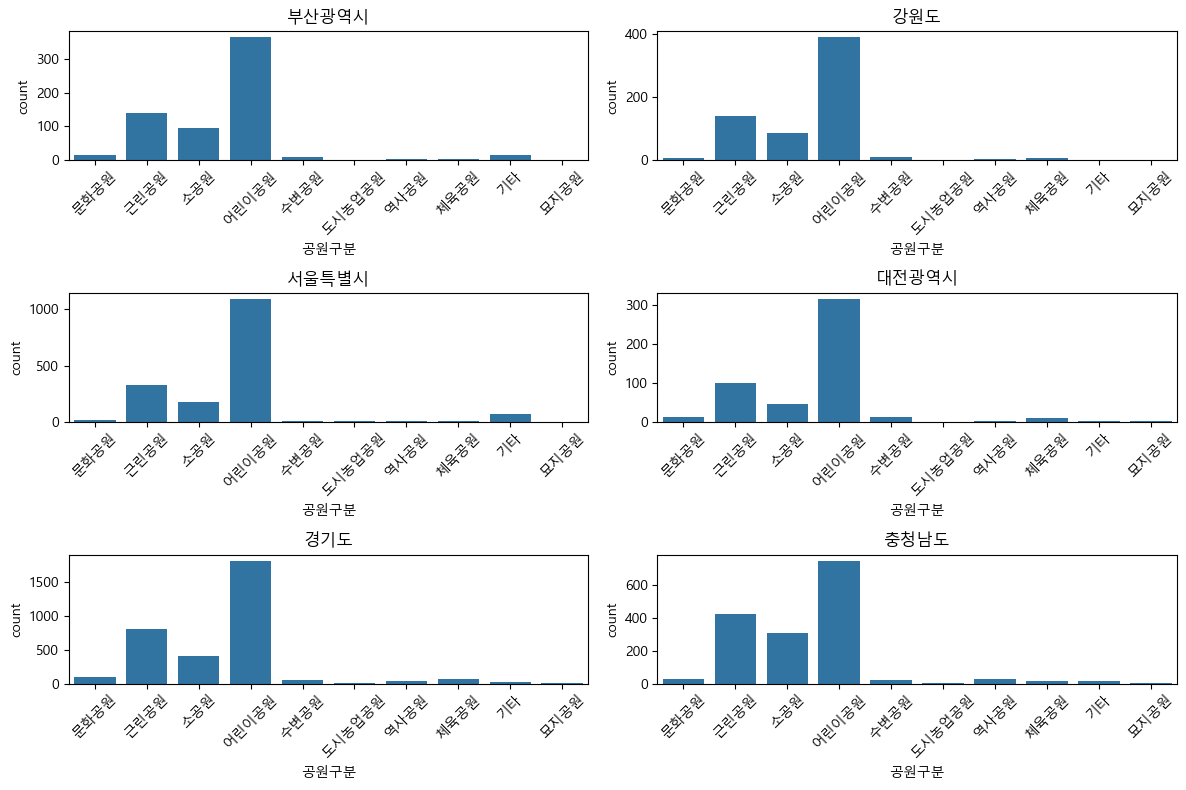

In [31]:
df6=dat2.copy()
df6=df6.loc[df6['시도'].isin(['부산광역시','서울특별시','강원도','충청남도','경기도','대전광역시'])]

x_tick_order=df6['공원구분'].unique()
all_sido=df6['시도'].unique()

fig=plt.figure(figsize=(12,8),dpi=100)
axs=fig.subplots(3,2).flatten()

for ax1, sido in zip(axs, all_sido):
    ## 코드작성
    df_sido=df6.loc[df6['시도']==sido]
    _=sns.countplot(data=df_sido, x='공원구분', ax=ax1, order=x_tick_order)
    ## 코드작성 끝
    
    _=ax1.tick_params(axis='x', labelrotation=45)
    _=ax1.set_title(sido)
    
fig.tight_layout()

# 문제7
* dat2을 전처리한 df7이 주어져 있다. 각 공원구분 별로 "가장" 많은 공원이 있는 시도와 그 해당 개수를 df7_res에 담으시오

In [32]:
df7=dat2.copy()
df7=df7.loc[df7['공원구분'].isin(['어린이공원', '근린공원', '소공원', '문화공원', '체육공원'])].copy()
df7

## 코드작성
df7_res=df7[['공원구분','시도']].value_counts().reset_index().drop_duplicates(subset=['공원구분'])
## 코드작성 끝

df7_res

,공원명,공원구분,시도,위도,경도,공원보유시설(편익시설),공원면적
0,구랑공원,문화공원,부산광역시,35.157215,128.854935,화장실,9137.0
1,압곡공원,근린공원,부산광역시,35.154655,128.854727,NaN,33756.0
2,서연정공원,소공원,부산광역시,35.216183,128.969558,NaN,646.0
3,용두공원,어린이공원,부산광역시,35.183679,128.956007,NaN,1620.0
4,새동내공원,어린이공원,부산광역시,35.174568,128.950612,NaN,1009.0
...,...,...,...,...,...,...,...
18131,화수3공원,어린이공원,인천광역시,37.485673,126.629367,NaN,483.1
18132,송림4공원,어린이공원,인천광역시,37.478715,126.653257,NaN,412.9
18133,서부공원,근린공원,경상북도,36.660456,129.114953,화장실,56045.0
18134,입암공원,근린공원,경상북도,36.594802,129.093007,NaN,109262.0


,공원구분,시도,count
0,어린이공원,경기도,1821
3,근린공원,경기도,806
5,소공원,전라남도,625
40,문화공원,경기도,91
44,체육공원,경기도,73


# dat3 load (문제8-11 사용)
* 행: 각 농장
* 열: 각 농장 번호, 농장 속한 지역, 농장이 재배하는 상품
* (문제를 위해 만든 가상데이터임)

In [33]:
dat3=pd.read_csv('data/dat3_농장.csv', sep=',', encoding='cp949')
dat3.head(3)

,농장번호,지역,상품
0,1,대구,"사과, 복숭아"
1,2,대구,인삼
2,3,대구,"단감, 복숭아, 포도"


# 문제8
* dat3을 전처리한 df8이 주어져 있다. df8을 가지고 
* 각 지역별 농장의 수를 ax1에
* 각 지역별, 복숭아 또는 인삼을 재배하는 농장의 수는 ax2에
* 시각화하는 코드이다. 비어있는 코드를 완성하시오

지역
대구    10
강릉    10
제주     2
Name: count, dtype: int64

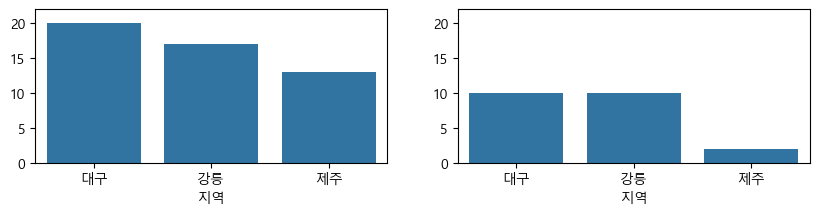

In [34]:
df8=dat3.copy()

fig=plt.figure(figsize=(10,2),dpi=100)
ax1,ax2=fig.subplots(1,2)

## ax1
sr8a=df8['지역'].value_counts()
_=sns.barplot(x=sr8a.index, y=sr8a.values, ax=ax1)

## ax2
## 코드작성
sr8b=df8.loc[df8['상품'].str.contains('복숭아|인삼'), '지역'].value_counts()
sr8b
_=sns.barplot(x=sr8b.index, y=sr8b.values, ax=ax2)
## 코드작성 끝

_=ax1.set_ylim(0,22)
_=ax2.set_ylim(0,22)

# 문제9
* dat3을 전처리한 df9가 주어져 있다.
* 각 지역별로
* 1) 하나의 상품을 재배하는 농장의 수
* 2) 두 개의 상품을 재배하는 농장의 수
* 3) 세 개의 상품을 재배하는 농장의 수를 
* 시각화하는 코드이다. 코드를 완성하시오
* 조건1) seaborn countplot을 사용하시오

<Axes: xlabel='지역', ylabel='count'>

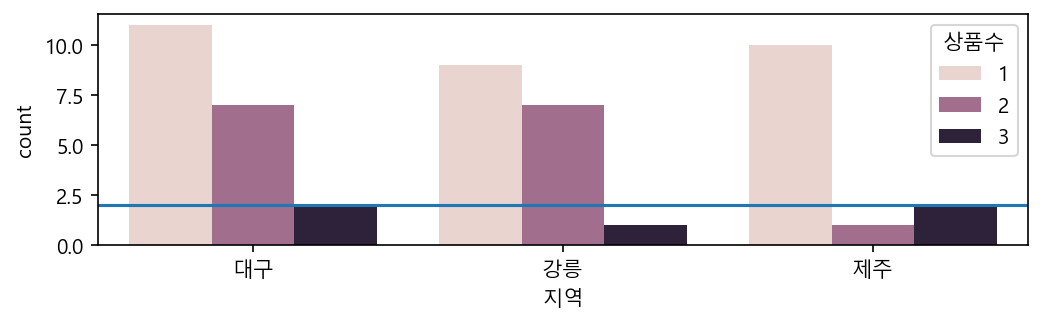

In [14]:
df9=dat3.copy()
###
df9['상품수']=df9['상품'].map(lambda x: len(x.split(',')))

fig=plt.figure(figsize=(8,2), dpi=150)
ax1=fig.subplots()

## 코드작성
sns.countplot(data=df9, x='지역', hue='상품수', ax=ax1)
## 코드작성 끝

ax1.axhline(2)

# 문제10
* dat3을 전처리한 df10가 주어져 있다.
* 지역별로 복숭아, 인삼, 사과, 포도를 재배하는 농장의 수를 아래와 같이 나타내시오
* 조건1) pandas plot을 사용하시오

<Axes: ylabel='지역'>

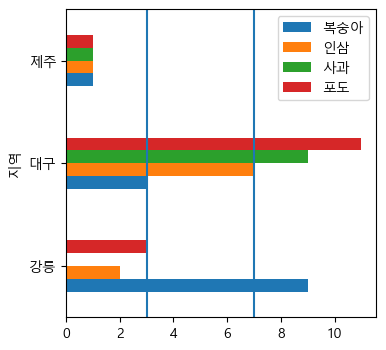

In [18]:
df10=dat3.copy()

fig=plt.figure(figsize=(4,4), dpi=100)
ax1=fig.subplots()

## 코드작성
A1=df10.loc[df10['상품'].str.contains('복숭아', na=False),'지역'].value_counts()
B1=df10.loc[df10['상품'].str.contains('인삼'),'지역'].value_counts()
C1=df10.loc[df10['상품'].str.contains('사과'),'지역'].value_counts()
D1=df10.loc[df10['상품'].str.contains('포도'),'지역'].value_counts()

df10a=pd.concat([A1,B1,C1,D1], axis=1)
df10a.columns=['복숭아','인삼','사과','포도']
df10a.plot.barh(ax=ax1)
## 코드작성 끝

_=ax1.axvline(3)
_=ax1.axvline(7)

# 문제11
* 주어진 df11에 '등급' column을 하나 추가하는데,
* '등급' column '삼'이 들어가는 상품을 재배하는 농장은 'A', 그렇지 않은 논장은 'B' 값을 갖도록 하시오

In [19]:
df11=dat3.copy()
df11.tail()

## 코드작성
def get_class(x):
    if ('삼' in x):
        return "A"
    else:
        return "B"
    
df11["등급"]=df11['상품'].map(get_class)
## 코드작성 끝

df11.tail()

,농장번호,지역,상품
45,46,강릉,복숭아
46,47,대구,"포도, 인삼"
47,48,대구,인삼
48,49,강릉,"귤, 복숭아"
49,50,강릉,"복숭아, 홍삼"


,농장번호,지역,상품,등급
45,46,강릉,복숭아,B
46,47,대구,"포도, 인삼",A
47,48,대구,인삼,A
48,49,강릉,"귤, 복숭아",B
49,50,강릉,"복숭아, 홍삼",A


# 문제12
* 아래는 dat2을 처리한 df12로부터, '화장실'이 있는 공원과 없는 공원을 marker로 나타내는 코드이다. 코드를 완성하시오
* 조건) 아이콘 색깔은 '화장실'이 있는경우 "파란색", '화장실'이 없는경우는 "빨간색"으로 하시오

In [10]:
import folium

df12=dat2.loc[dat2['시도']=='서울특별시'].iloc[::70].copy()
lat_m=df12['위도'].mean()
long_m=df12['경도'].mean()

m = folium.Map([lat_m, long_m], zoom_start=11)

## 코드작성
b12=df12['공원보유시설(편익시설)'].str.contains('화장실', na=False)
df12_AV=df12.loc[b12]
df12_NA=df12.loc[~b12]

for i in df12_AV.index:
    sub_lat, sub_long, title = df12_AV.loc[i, ["위도", '경도', '공원명']]
        
    _=folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color='blue'),
        tooltip=title).add_to(m)
    
for i in df12_NA.index:
    sub_lat, sub_long, title = df12_NA.loc[i, ["위도", '경도', '공원명']]
        
    _=folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color='red'),
        tooltip=title).add_to(m)
## 코드작성 끝

m

# 문제13
* 지하철역 데이터를 전처리한 df_station이 있다.
* df_station을 활용하여, 주어진 지하철역(station)으로부터 주어진 반경 (dst_th: km) 안에 있는 다른 지하철역을 지도위에 표시하시오
* 조건1) 주어진 지하철역은 빨간색, 반경안에 있는 다른 지하철역은 초록색으로 표시하시오
* 조건2) 반경을 나타내는 원을 표시하시오
* 조건3) tooltip에는 해당 지하철역 이름이 나타나게 하시오

In [11]:
#%pip install haversine
from haversine import haversine

## 입력: taget 지하철역
station='시청'
dst_th=1

## 지하철역 데이터 load
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
df_station = df_station[['역명','위도','경도']].drop_duplicates(subset=['역명'])
df_station.head()

## 입력 지하철역 좌표 구하기
station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
s_lat, s_long=station_latlong.iloc[0]
station, s_lat, s_long

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)

######### 코드작성

# 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

# apply활용
df_station['거리']=df_station.apply(get_distance, axis=1)

## dst_th안에 있는 다른 지하철역 구하기
df_station_selected=df_station.loc[df_station['거리']<=dst_th]

## 지하철역 marekr & cicle 추가
_=folium.Circle([s_lat, s_long], radius=dst_th*1000, color='blue', fill=True).add_to(m)# radius -> 반지름 단위(m)

## 상점 marker 추가
for ind in df_station_selected.index:
    stat1, h_lat, h_long, dist=df_station_selected.loc[ind]
    if stat1==station:
        continue
    
    ## 상점 marker 추가
    _=folium.Marker([h_lat, h_long], tooltip=stat1, icon=folium.Icon(color="green")).add_to(m)

_=folium.Marker([s_lat, s_long], tooltip=station, icon=folium.Icon(color="red")).add_to(m)
## map 확인

######### 코드작성 끝
m

,역명,위도,경도
0,서울,37.553150,126.972533
1,시청,37.563590,126.975407
2,종각,37.570203,126.983116
3,종로3가,37.570429,126.992095
4,종로5가,37.570971,127.001900


('시청', 37.56359, 126.975407)

In [ ]:
11
folium 기본

In [ ]:
12 문자넣기

In [ ]:
13 14주차